<div >
    <img src = "../banner/banner_ML_UNLP_1900_200.png" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/ML_UNLP_Lectures/blob/main/Week04/Notebook_SS04_clasification.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



# Classification

To work through the steps of probability-based classification, we’ll use a real dataset on loans and credit from a set of local lenders in Germany (taken from the UC Irvine Machine Learning Repository and cleaned for our purposes). 

Credit scoring is a classic problem of classification, and it remains one of the big application domains for ML: use previous loan results (default versus payment) to train a model that can predict the performance of potential new loans.

\begin{align}
Default=f(x) + u
\end{align}

where $Default=I(Default=1)$



# Dataset

Let's load the modules:

In [2]:
import numpy as np
import pandas as pd

In [3]:
db = pd.read_csv("https://raw.githubusercontent.com/ignaciomsarmiento/datasets/main/credit.csv")
db.head()

,Unnamed: 0,Default,duration,amount,installment,age,history,purpose,foreign,rent
0,1,0,6,1169,4,67,terrible,goods/repair,foreign,False
1,2,1,48,5951,2,22,poor,goods/repair,foreign,False
2,3,0,12,2096,2,49,terrible,edu,foreign,False
3,4,0,42,7882,2,45,poor,goods/repair,foreign,False
4,5,1,24,4870,3,53,poor,newcar,foreign,False


In [4]:
db = db.iloc[:, 1:] #remove first column
db.head()

,Default,duration,amount,installment,age,history,purpose,foreign,rent
0,0,6,1169,4,67,terrible,goods/repair,foreign,False
1,1,48,5951,2,22,poor,goods/repair,foreign,False
2,0,12,2096,2,49,terrible,edu,foreign,False
3,0,42,7882,2,45,poor,goods/repair,foreign,False
4,1,24,4870,3,53,poor,newcar,foreign,False


In [5]:
db['Default'].value_counts(normalize=True) * 100

0    70.0
1    30.0
Name: Default, dtype: float64

In [6]:
db['foreign'].value_counts(normalize=True) * 100


foreign    96.3
german      3.7
Name: foreign, dtype: float64

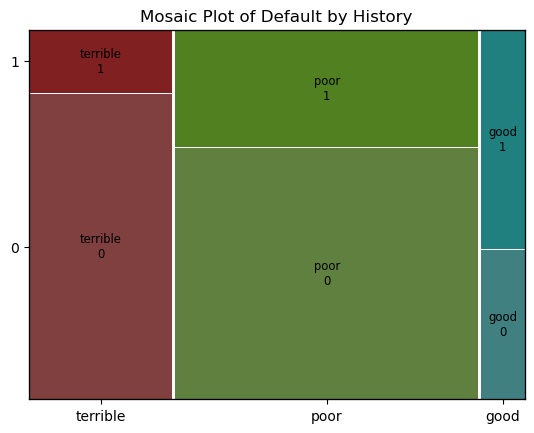

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Assuming df is your DataFrame equivalent to the 'credit' data frame in R
# and it contains 'Default' and 'history' columns

# Create a mosaic plot
mosaic(db, ['history', 'Default'], title='Mosaic Plot of Default by History')
plt.ylabel('Default')
plt.show()


## Clean and plit the data

In [8]:
from sklearn.model_selection import train_test_split


# Separate the independent and dependent variables
X = db.drop('Default', axis=1)
y = db['Default']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True,
                                        stratify=y
                                    )


In [9]:
y_train.value_counts(normalize=True) * 100

0    70.0
1    30.0
Name: Default, dtype: float64

In [10]:
y_test.value_counts(normalize=True) * 100

0    70.0
1    30.0
Name: Default, dtype: float64

In [11]:
# One-hot encode categorical variables
X_train_to_encode=X_train.drop(['duration', 'amount', 'installment', 'age'], axis=1)
X_test_to_encode=X_test.drop(['duration', 'amount', 'installment', 'age'], axis=1)


X_train_encoded = pd.get_dummies(X_train_to_encode,columns=['history', 'purpose','foreign','rent'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test_to_encode,columns=['history', 'purpose','foreign','rent'], drop_first=True)

# Ensure the same columns in both train and test sets
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)



In [12]:
X_train_encoded

,history_poor,history_terrible,purpose_edu,purpose_goods/repair,purpose_newcar,purpose_usedcar,foreign_german,rent_True
428,1,0,0,1,0,0,0,0
699,1,0,1,0,0,0,0,1
46,1,0,0,1,0,0,0,0
99,1,0,0,0,0,1,0,1
664,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
731,1,0,0,1,0,0,0,1
687,1,0,0,0,1,0,0,0
315,0,0,0,1,0,0,0,0
862,1,0,0,1,0,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler


# Create a list of numerical columns (i.e., columns to be scaled)
numerical_columns = X_train.columns.drop(['history', 'purpose', 'foreign', 'rent'])
numerical_columns

# # Initialize the StandardScaler
scaler = StandardScaler()

# # Fit the scaler to the numerical columns of the training data and transform
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
# # Transform the test data
X_test_scaled = scaler.fit_transform(X_test[numerical_columns])

# Convert the scaled arrays back into DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_columns, index=X_test.index)

# Reset the index of the DataFrames to align them correctly
X_train_scaled_df.reset_index(drop=True, inplace=True)
X_test_scaled_df.reset_index(drop=True, inplace=True)
X_train_encoded.reset_index(drop=True, inplace=True)
X_test_encoded.reset_index(drop=True, inplace=True)

# Combine scaled numerical and encoded categorical features
X_train = pd.concat([X_train_scaled_df, X_train_encoded], axis=1)
X_test = pd.concat([X_test_scaled_df, X_test_encoded], axis=1)

In [14]:
X_train.head()

,duration,amount,installment,age,history_poor,history_terrible,purpose_edu,purpose_goods/repair,purpose_newcar,purpose_usedcar,foreign_german,rent_True
0,-0.991076,-0.710033,-1.798849,-1.373603,1,0,0,1,0,0,0,0
1,-0.497492,-0.498744,0.906187,0.435704,1,0,1,0,0,0,0,1
2,1.230053,-0.358123,0.906187,0.345238,1,0,0,1,0,0,0,0
3,-0.086172,1.340039,0.004508,0.073842,1,0,0,0,0,1,0,1
4,-1.237869,-0.804970,-0.897170,1.340357,0,1,1,0,0,0,0,0


## Estimación Logit

\begin{align}
p_i &=\frac{e^{X_i\beta}}{1+e^{X_i\beta}}
\end{align}


In [15]:
from sklearn.linear_model import LogisticRegression

# Fit the logistic regression model
logit_model = LogisticRegression(max_iter=200 )
logit_model.fit(X_train,y_train)


LogisticRegression(max_iter=200)

## Prediction


\begin{align}
\hat{p}_i &=\frac{e^{X_i\hat{\beta}}}{1+e^{X_i\hat{\beta}}}
\end{align}

In [16]:
y_test=pd.DataFrame(y_test)
y_test.head()

,Default
892,0
615,0
800,0
487,0
354,0


In [17]:
# Predict the probabilities
y_test['prob_hat'] = logit_model.predict_proba(X_test)[:, 1]

# Display the first few rows of the specified columns
y_test.head(10)


,Default,prob_hat
892,0,0.143404
615,0,0.772400
800,0,0.264032
487,0,0.417119
354,0,0.357296
473,0,0.400183
678,0,0.339247
179,0,0.176896
23,0,0.048141
460,0,0.217775


## Red Neuronal

In [18]:
#Keras necesita floats de 32

X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)



In [19]:
X_train.shape[1]

12

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam


model_nn = Sequential([
  Dense(64, input_dim=X_train.shape[1], activation='relu'),
  Dropout(0.4),
  Dense(32, activation='relu'),
  Dropout(0.3),
  Dense(1, activation='sigmoid')
])


model_nn.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy', #y log(p) + (1-y) log (1-p)
    metrics=['accuracy']) #total de aciertos/total de obs

2023-12-04 22:56:24.270283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


We are going to add one extra step: **EarlyStopping**

EarlyStopping is a callback to stop training when a monitored metric has stopped improving.
   -  monitor='val_loss': This specifies that the callback should monitor the validation loss.
   - patience=10: This sets the number of epochs with no improvement after which training will be stopped. Here, training will stop if there is no decrease in validation loss for 10 consecutive epochs.
   - verbose=1: This enables verbose output, which means the callback will print a message when it stops the training.
   - mode='min': This tells the callback that the training should stop when the monitored quantity (in this case, val_loss) has stopped decreasing.

This callback are used during model training to automatically stop training when the validation loss does not improve for a certain number of epochs (EarlyStopping).

This approach is commonly used to prevent overfitting.

In [21]:
history = model_nn.fit(
    X_train, y_train,
    epochs=150,
    batch_size=256,
    validation_split=0.2,
    callbacks=EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'),
    verbose=1)

Epoch 1/150
3/3 [==============================] - 1s 87ms/step - loss: 0.6912 - accuracy: 0.5562 - val_loss: 0.6807 - val_accuracy: 0.5938
Epoch 2/150
3/3 [==============================] - 0s 21ms/step - loss: 0.6600 - accuracy: 0.6297 - val_loss: 0.6632 - val_accuracy: 0.6313
Epoch 3/150
3/3 [==============================] - 0s 25ms/step - loss: 0.6497 - accuracy: 0.6531 - val_loss: 0.6498 - val_accuracy: 0.6687
Epoch 4/150
3/3 [==============================] - 0s 18ms/step - loss: 0.6370 - accuracy: 0.6891 - val_loss: 0.6392 - val_accuracy: 0.6687
Epoch 5/150
3/3 [==============================] - 0s 18ms/step - loss: 0.6356 - accuracy: 0.6812 - val_loss: 0.6306 - val_accuracy: 0.6750
Epoch 6/150
3/3 [==============================] - 0s 18ms/step - loss: 0.6202 - accuracy: 0.6781 - val_loss: 0.6235 - val_accuracy: 0.6750
Epoch 7/150
3/3 [==============================] - 0s 15ms/step - loss: 0.6076 - accuracy: 0.7078 - val_loss: 0.6174 - val_accuracy: 0.6750
Epoch 8/150
3/3 [===

3/3 [==============================] - 0s 26ms/step - loss: 0.5376 - accuracy: 0.7406 - val_loss: 0.5558 - val_accuracy: 0.6938
Epoch 60/150
3/3 [==============================] - 0s 23ms/step - loss: 0.5270 - accuracy: 0.7328 - val_loss: 0.5554 - val_accuracy: 0.6875
Epoch 61/150
3/3 [==============================] - 0s 21ms/step - loss: 0.5437 - accuracy: 0.7234 - val_loss: 0.5552 - val_accuracy: 0.6938
Epoch 62/150
3/3 [==============================] - 0s 17ms/step - loss: 0.5389 - accuracy: 0.7359 - val_loss: 0.5556 - val_accuracy: 0.6938
Epoch 63/150
3/3 [==============================] - 0s 14ms/step - loss: 0.5401 - accuracy: 0.7344 - val_loss: 0.5560 - val_accuracy: 0.7000
Epoch 64/150
3/3 [==============================] - 0s 13ms/step - loss: 0.5256 - accuracy: 0.7406 - val_loss: 0.5563 - val_accuracy: 0.7000
Epoch 65/150
3/3 [==============================] - 0s 13ms/step - loss: 0.5285 - accuracy: 0.7422 - val_loss: 0.5572 - val_accuracy: 0.7000
Epoch 66/150
3/3 [========

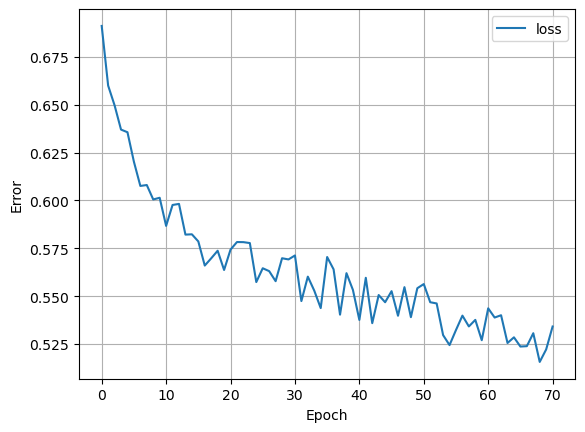

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss') 
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)


In [23]:
y_test['prob_hat_nn'] = model_nn.predict(X_test).ravel()

7/7 [==============================] - 0s 1ms/step


In [24]:
y_test.head()

,Default,prob_hat,prob_hat_nn
892,0,0.143404,0.138443
615,0,0.772400,0.684591
800,0,0.264032,0.173685
487,0,0.417119,0.353162
354,0,0.357296,0.365395


In [25]:
 model_nn.evaluate(X_train, y_train, verbose=0)

[0.5168155431747437, 0.7400000095367432]

# Classification and Missclasification



\begin{align}
\hat{Y}_i= 1[\hat{p}_i >0.5]
\end{align}

In [26]:
# Define the rule (threshold)
rule = 0.5

# Create the predicted class labels based on the rule
y_test['Default_hat_logit'] = (y_test['prob_hat'] > rule).astype(int)

# Display the first few rows of the specified columns
y_test[['Default', 'prob_hat', 'Default_hat_logit']].head(10)

,Default,prob_hat,Default_hat_logit
892,0,0.143404,0
615,0,0.772400,1
800,0,0.264032,0
487,0,0.417119,0
354,0,0.357296,0
473,0,0.400183,0
678,0,0.339247,0
179,0,0.176896,0
23,0,0.048141,0
460,0,0.217775,0


In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(
            y_true    = y_test['Default'],
            y_pred    = y_test['Default_hat_logit'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")




El accuracy de test es: 72.5%


In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test['Default'],
    y_test['Default_hat_logit'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix



Predicción,0,1
Real,,
0,123,17
1,38,22


## Red Neuronal

In [29]:

# Create the predicted class labels based on the rule
y_test['Default_hat_nn'] = (y_test['prob_hat_nn'] > rule).astype(int)

# Display the first few rows of the specified columns
y_test[['Default', 'prob_hat_nn', 'Default_hat_nn']].head(10)

,Default,prob_hat_nn,Default_hat_nn
892,0,0.138443,0
615,0,0.684591,1
800,0,0.173685,0
487,0,0.353162,0
354,0,0.365395,0
473,0,0.409869,0
678,0,0.407145,0
179,0,0.096534,0
23,0,0.048663,0
460,0,0.274393,0


In [30]:

accuracy = accuracy_score(
            y_true    = y_test['Default'],
            y_pred    = y_test['Default_hat_nn'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")




El accuracy de test es: 72.0%


In [31]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test['Default'],
    y_test['Default_hat_nn'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,122,18
1,38,22


# F1 scores

In [32]:
from sklearn.metrics import f1_score



# Dictionary to hold F1 scores
f1_scores = {}

f1_scores['Logit'] = f1_score(    y_test['Default'], y_test['Default_hat_logit'])
f1_scores['NN'] = f1_score(    y_test['Default'], y_test['Default_hat_nn'])


In [33]:
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])
print(f1_df)

   Model  F1 Score
0  Logit  0.444444
1     NN  0.440000


# ROC

In [35]:
import sklearn
from sklearn.metrics import roc_curve, auc

In [36]:
fpr, tpr, _ = roc_curve(y_test['Default'], y_test['prob_hat'])
roc_auc = auc(fpr, tpr)



In [37]:
roc_auc

0.7328571428571429

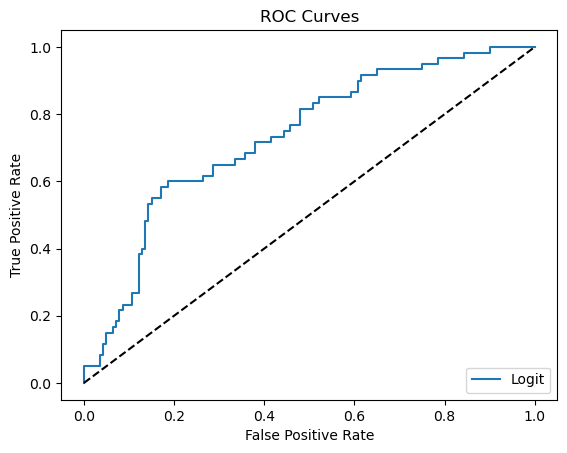

In [38]:

# Plot ROC curve
plt.plot(fpr, tpr, label='Logit')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

In [39]:

fpr_nn, tpr_nn, _ = roc_curve(y_test['Default'], y_test['prob_hat_nn'])
roc_auc_nn = auc(fpr_nn, tpr_nn)
roc_auc_nn



0.7322619047619047

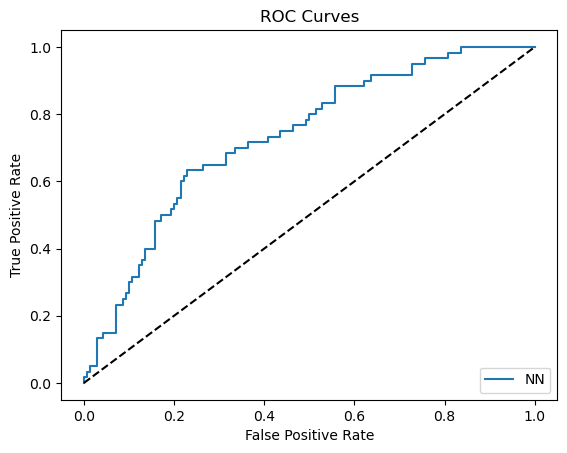

In [40]:

# Plot ROC curve
plt.plot(fpr_nn, tpr_nn, label='NN')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

In [42]:
fpr, tpr, thresholds = roc_curve(y_test['Default'], y_test['prob_hat'])

# Calculate the Euclidean distance for each point on the ROC curve from the top-left corner
distances = np.sqrt((1 - tpr) ** 2 + fpr ** 2)

# Find the optimal threshold
optimal_idx = np.argmin(distances)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.42597021299838156

In [43]:

# Create the predicted class labels based on the rule
y_test['Default_hat_optimal'] = (y_test['prob_hat'] > optimal_threshold).astype(int)


In [44]:

accuracy = accuracy_score(
            y_true    = y_test['Default'],
            y_pred    = y_test['Default_hat_optimal'],
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")




El accuracy de test es: 74.5%


In [45]:
print(f"El F1 de test es: {100*f1_score(    y_test['Default'], y_test['Default_hat_optimal'])}%")

El F1 de test es: 57.85123966942148%


In [46]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test['Default'],
    y_test['Default_hat_optimal'],
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,114,26
1,25,35
